In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

# Parameters
nx, nz = 200, 200  # Grid size
dx, dz = 10.0, 10.0  # Grid spacing in meters
freq = 12.5  # Frequency in Hz
c = 1500.0  # Speed of sound in m/s
omega = 2 * np.pi * freq

# Initialize pressure field P with zeros
P = np.zeros((nx, nz), dtype=np.complex128)

# Insert a source term at the center
P[nx//2, nz//2] = 1.0 + 0.0j

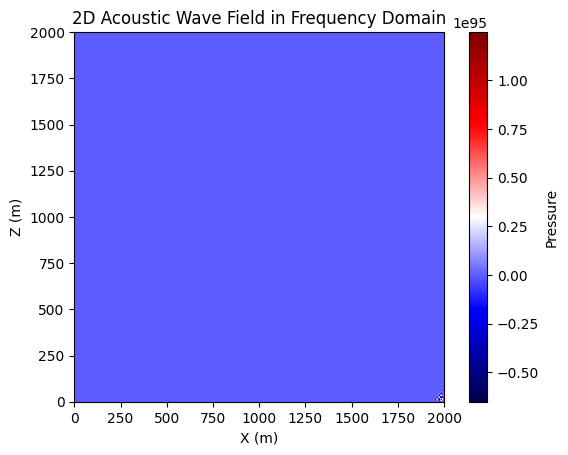

In [ ]:
# Function to generate a Ricker wavelet in the frequency domain
def ricker_wavelet(f, peak_freq, dt, nt):
    t = np.arange(-nt//2, nt//2, 1) * dt
    a = np.sqrt(np.pi) / peak_freq
    psi_t = (1 - 2*(np.pi**2)*(a**2)*(t**2)) * np.exp(-(np.pi**2)*(a**2)*(t**2))
    psi_f = np.fft.fftshift(np.fft.fft(psi_t))
    return psi_f

# Time domain parameters
dt = 0.004  # Time step in seconds
nt = 400  # Number of time samples
peak_freq = freq  # Peak frequency of the Ricker wavelet (same as before)

# Generate the Ricker wavelet in the frequency domain
frequencies = np.fft.fftshift(np.fft.fftfreq(nt, dt))
ricker_f = ricker_wavelet(frequencies, peak_freq, dt, nt)


# Wave number squared
k2 = (omega / c) ** 2

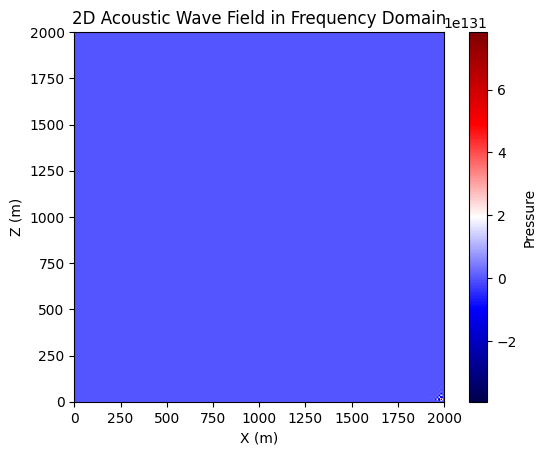

In [21]:

# Iteration for the finite difference solution
for iteration in range(20):
    for i in range(1, nx-1):
        for j in range(1, nz-1):
            # Second derivatives using central difference
            d2P_dx2 = (P[i+1, j] - 2*P[i, j] + P[i-1, j]) / dx**2
            d2P_dz2 = (P[i, j+1] - 2*P[i, j] + P[i, j-1]) / dz**2
            
            # Update the pressure field based on the wave equation
            P[i, j] = (d2P_dx2 + d2P_dz2 - k2 * P[i, j]) / -k2

# Apply free surface boundary condition by setting the pressure to zero at the boundaries
P[0, :] = P[-1, :] = 0.0
P[:, 0] = P[:, -1] = 0.0

# Plot the real part of the pressure field
plt.imshow(np.real(P), cmap='seismic', extent=[0, nx*dx, 0, nz*dz])
plt.colorbar(label='Pressure')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.title('2D Acoustic Wave Field in Frequency Domain')
plt.show()
